# Machine Learning Exercise 1 - Linear Regression

## Linear regression with one variable

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
data = pd.read_csv('ex1data1.txt', header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


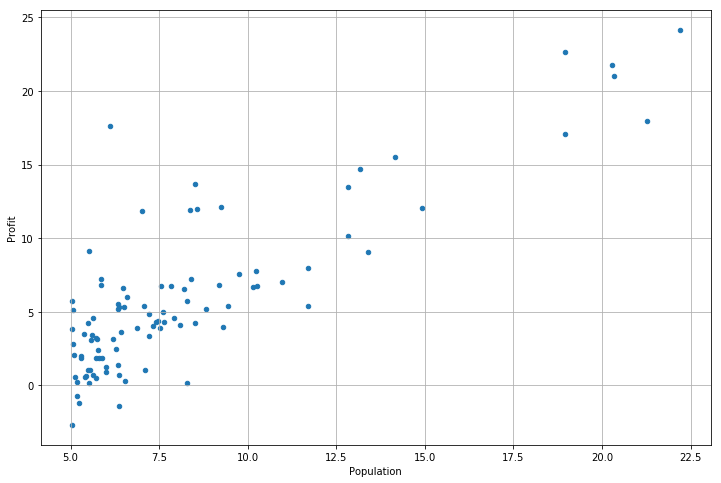

In [4]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8),grid=True);

In [5]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Text(0,0.5,'Profit in $10,000s')

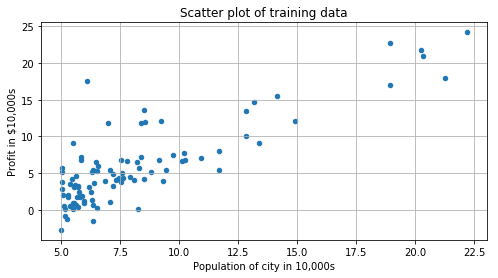

In [6]:
ax = data.plot(kind='scatter', x='Population', y='Profit', title='Scatter plot of training data', figsize=(8,4),grid=True);
ax.set_xlabel('Population of city in 10,000s')
ax.set_ylabel('Profit in $10,000s')

## Gradiente Descendente

First, you create a function to compute the cost of a given solution (characterized by the parameters beta):

In [7]:
def compute_cost(X, y, beta):
    m = len(X)
    J = np.sum(np.power((X.dot(beta.T) - y),2))/(2*m)
    return J
    

We store each example as a row in the X matrix. To take into account the intercept term (\beta0), we add an additional first column to X and set it to all ones. This allows us to treat \beta0 as simply another 'feature'.

In [8]:
data.insert(0, 'beta zero', 1)

Now let's do some variable initialization

In [9]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

Now, you need to guarantee that X (training set) and y (target variable) are correct.

In [10]:
X.head()

,beta zero,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [11]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


The cost function is expecting numpy matrices so we need to convert X and y before we can use them. We also need to initialize beta.

In [12]:
X = np.matrix(X.values)
y = np.matrix(y.values)
beta = np.matrix(np.array([0,0]))

Here's what beta looks like.

In [13]:
beta

matrix([[0, 0]])

Let's take a quick look at the shape of our matrices.

In [14]:
X.shape, beta.shape, y.shape

((97, 2), (1, 2), (97, 1))

Now let's compute the cost for our initial solution (0 values for beta).

In [15]:
compute_cost(X, y, beta)

32.072733877455676

Now, you are asked to define a function to perform gradient descent on the parameters beta

In [16]:
def gradient_descent(X, y, theta, alpha, iters):
    temp       = np.matrix(np.zeros(theta.shape)) 
    parameters = int(theta.ravel().shape[1]) 
    cost       = np.zeros(iters) 
    n = len(X)
    for i in range(iters):        
        for j in range(parameters):
            gradient = np.multiply((X.dot(theta.T) - y),X[:,j])
            temp[0,j] -= (alpha/(n)) * np.sum(gradient) 
            
        theta = temp #atualiza
        cost[i] = compute_cost(X, y, theta)        
    return theta, cost

Initialize some additional variables - the learning rate alpha, and the number of iterations to perform

In [17]:
alpha = 0.01
iters = 1500

Now let's run the gradient descent algorithm to fit our parameters theta to the training set.

In [18]:
g, cost = gradient_descent(X, y, beta, alpha, iters)
print ("Coeficiente Angular da função")
print (g)
print ("\nResiduos")
print (cost)

Coeficiente Angular da função
[[-3.63609474  1.16699229]]

Residuos
[ 6.73719046  5.93238265  5.90102959 ...,  4.48315549  4.48313304
  4.48311066]


### Predição de Lucro com a Regressão Linear

In [19]:
p1 = np.matmul(g,[[1], [3.5]])
p2 = np.matmul(g,[[1], [7]])

In [32]:
print('35000 habitantes -> ${0:.2f}' .format(p1.item(0)*10000))
print('\n70000 habitantes -> ${0:.2f}' .format(p2.item(0)*10000))

35000 habitantes -> $4483.78

70000 habitantes -> $45328.51


Finally we can compute the cost (error) of the trained model using our fitted parameters.

In [21]:
print ("Erro do treino")
compute_cost(X, y, g)

Erro do treino


4.483110660040591

Now let's plot the linear model along with the data to visually see how well it fits.

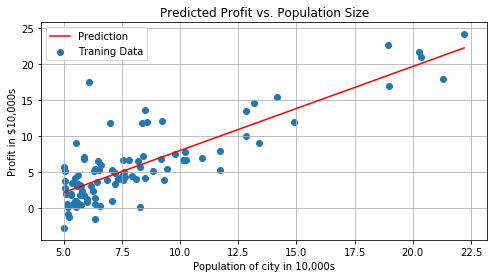

In [22]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population of city in 10,000s')
ax.set_ylabel('Profit in $10,000s')
ax.set_title('Predicted Profit vs. Population Size')
ax.grid(True)

Looks pretty good! Remember that the gradient decent function also outputs a vector with the cost at each training iteration, we can plot it as well. 

Since the cost always decreases - this is an example of a convex optimization problem.

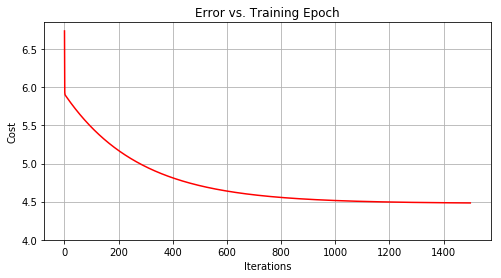

In [23]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_ylim(4.0)
ax.set_title('Error vs. Training Epoch')
ax.grid(True)

Now, we will show a contour plot that presents beta0 against beta1 and the outcome of J. First, we set values for beta0 and beta1

In [24]:
beta0_vals = np.linspace(-10, 10, 100)
beta1_vals = np.linspace(-1, 4, 100)

Now, initialize J values to a matrix of 0's

In [25]:
j_vals = np.zeros([len(beta0_vals), len(beta1_vals)])

In [26]:
for i in range(len(beta0_vals)):
    for j in range(len(beta1_vals)):
        t = np.matrix(np.array([beta0_vals[i], beta1_vals[j]]))
        j_vals[i,j] = compute_cost(X, y, t)

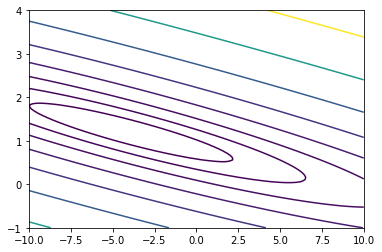

In [27]:
plt.contour(beta0_vals, beta1_vals, j_vals.T, np.logspace(-2, 3, 20));

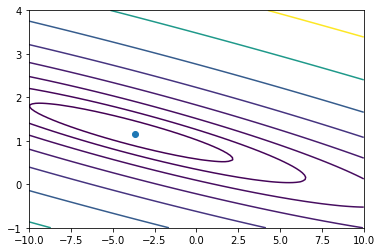

In [28]:
plt.scatter(g[0,0],g[0,1],)
plt.contour(beta0_vals, beta1_vals, j_vals.T, np.logspace(-2, 3, 20));

Now, in 3D

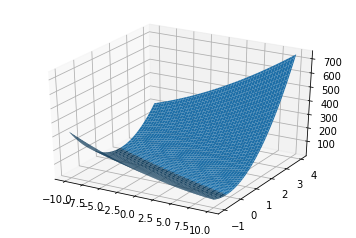

In [29]:
beta0_mesh, beta1_mesh = np.meshgrid(beta0_vals, beta1_vals)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(beta0_mesh, beta1_mesh, j_vals.T);

## Linear regression with multiple variables

From now on, you will use the second dataset, i.e., ex1data2.txt. This is a housing price dataset with 2 variables (size of the house in square feet and number of bedrooms) and a target (price of the house). You are asked to use the techniques already applied to analyze that data set.

In [ ]:
data2 = pd.read_csv('ex1data2.txt', header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

For this task we add another pre-processing step - normalizing the features.

Notice that the scale of the values for each feature is vastly large. A house will typically have 2-5 bedrooms, but may have anywhere from hundreds to thousands of square feet. If we use the features as they are in the dataset, the 'size' feature would too much wheighted and would end up dwarfing any contributions from the 'number of bedrooms' feature. To fix this, we need to do something called 'feature normalization'. That is, we need to adjust the scale of the features to level the playing field. One way to do this is by subtracting from each value in a feature the mean of that feature, and then dividing by the standard deviation.

In [ ]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

Given that you were asked to implement both cost function and gradient descent using matrix operations, your previously implementations will work just fine in the multivariate dataset. Hence, you need now insert the 'ones' column as before and separate the X's and the y's.

Conduct the rest of this exercise by repeating the experiments conducted in the simple linear dataset...